## Tugas Pertemuan Minggu ke-5 - Klasifikasi dengan Naive Bayes
Nama : Wahyu Adi Nugroho <br>
NIM  : A11.2019.12310 <br>
Kelp : 46UG <br>
<hr><br>
Kerjakan Latihan tahapan klasifikasi dengan naïve bayes pada latihan sebelumnya, dataset bisa diganti / dimodifikasi, simpan dalam naive_bayes.py atau naive_bayes.ipynb, repositorikan file pada github.com dan kirimkan URL github melalui Assignment pada kulino (Pada blok Minggu ke-5).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel("datapemilukpu.xls")

In [3]:
dataset.head(5)

,NAMA PARTAI POLITIK,NAMA CALON LEGESLATIF,JENIS KELAMIN,KECAMATAN,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,NO.URUT CALEG,SUARA SAH CALEG,TERPILIH ATAU TIDAK
0,HATI NURANI RAKYAT,"TOTO SUKISNO,BSc",L,LEBAKSIU,1,18578,1,1,1.0,594,TIDAK
1,HATI NURANI RAKYAT,"EDI PURYANTO,SH",L,SLAWI,1,18578,1,1,2.0,943,TIDAK
2,HATI NURANI RAKYAT,"ELI RETNOWATI,SH",P,SLAWI,1,18578,1,1,3.0,1730,TIDAK
3,HATI NURANI RAKYAT,SAHYUDIN,L,DUKUHWARU,1,18578,1,1,4.0,2508,YA
4,HATI NURANI RAKYAT,"H.FAJAR SIGIT KUSUMAJAYA,SH",L,SLAWI,1,18578,1,2,1.0,923,TIDAK


In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=1)
x[:, 8:9] = imputer.fit_transform(x[:, 8:9])

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
x = x[:, 8:10]

In [8]:
print(x)

[[1.0 594]
 [2.0 943]
 [3.0 1730]
 [4.0 2508]
 [1.0 923]
 [2.0 308]
 [3.0 54]
 [1.0 1682]
 [2.0 918]
 [3.0 87]
 [1.0 728]
 [2.0 346]
 [3.0 184]
 [1.0 381]
 [2.0 148]
 [3.0 128]
 [1.0 441]
 [2.0 88]
 [3.0 74]
 [1.0 351]
 [1.0 972]
 [2.0 307]
 [1.0 274]
 [2.0 186]
 [1.0 844]
 [2.0 333]
 [1.0 804]
 [2.0 275]
 [1.0 848]
 [2.0 461]
 [3.0 119]
 [1.0 130]
 [1.0 219]
 [1.0 154]
 [1.0 179]
 [1.0 237]
 [1.0 621]
 [1.0 1912]
 [1.0 265]
 [2.0 117]
 [3.0 110]
 [4.0 124]
 [1.0 504]
 [2.0 500]
 [3.0 286]
 [4.0 237]
 [1.0 3149]
 [2.0 494]
 [3.0 423]
 [1.0 678]
 [2.0 258]
 [3.0 186]
 [1.0 891]
 [2.0 255]
 [3.0 1328]
 [1.0 1293]
 [2.0 902]
 [3.0 583]
 [1.0 446]
 [2.0 195]
 [3.0 152]
 [4.0 157]
 [5.0 231]
 [1.0 95]
 [2.0 121]
 [3.0 18]
 [1.0 148]
 [1.0 106]
 [1.0 111]
 [1.0 93]
 [1.0 1697]
 [2.0 790]
 [3.0 432]
 [4.0 979]
 [5.0 841]
 [6.0 485]
 [7.0 1076]
 [8.0 235]
 [9.0 338]
 [1.0 720]
 [2.0 505]
 [3.0 886]
 [4.0 639]
 [5.0 367]
 [6.0 104]
 [7.0 159]
 [8.0 69]
 [1.0 696]
 [2.0 414]
 [3.0 1297]
 [4.0 17

In [9]:
print(y)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[ 2.69369947 -0.34082057]
 [-0.95373712 -0.71640086]
 [ 1.07261654 -0.66397761]
 [ 0.26207507 -0.50383534]
 [-0.95373712 -0.0384892 ]
 [ 2.28842873  0.39525936]
 [-0.14319566 -0.1483626 ]
 [ 1.883158    0.73062456]
 [-0.54846639 -0.7630791 ]
 [-0.95373712 -0.67905827]
 [-0.14319566 -0.65751447]
 [-0.14319566  0.1467875 ]
 [-0.95373712 -0.72573651]
 [-0.54846639 -0.56415799]
 [-0.54846639 -0.08660369]
 [-0.95373712 -0.47439215]
 [ 2.28842873  0.69759073]
 [-0.95373712 -0.29773296]
 [-0.54846639  0.53098532]
 [-0.54846639  1.19668883]
 [ 1.07261654 -0.75446158]
 [-0.95373712 -0.72860902]
 [ 0.66734581  0.93098193]
 [-0.14319566  0.4017225 ]
 [-0.14319566 -0.25177285]
 [-0.95373712  4.79163141]
 [-0.95373712 -0.58785617]
 [-0.54846639 -0.4758284 ]
 [ 2.28842873  2.90223989]
 [ 0.66734581 -0.48013716]
 [-0.95373712 -0.74009905]
 [-0.95373712  0.31482917]
 [-0.95373712 -0.67834015]
 [ 0.26207507  0.10585428]
 [-0.54846639 -0.61945375]
 [ 1.883158   -0.66613199]
 [ 0.66734581 -0.47008339]
 

In [13]:
print(x_test)

[[-0.54846639  0.1467875 ]
 [-0.14319566  0.27317781]
 [ 2.69369947  0.56186477]
 [-0.14319566 -0.42268702]
 [ 1.07261654 -0.43130454]
 [-0.14319566 -0.67546764]
 [-0.95373712 -0.74225343]
 [-0.54846639  0.0742567 ]
 [ 1.47788727 -0.76236098]
 [-0.95373712 -0.76882412]
 [-0.95373712  0.58843546]
 [ 0.26207507  1.05378161]
 [ 2.69369947 -0.59575557]
 [ 1.47788727  2.48285386]
 [-0.14319566 -0.65248758]
 [-0.54846639 -0.64458819]
 [-0.95373712 -0.72932715]
 [ 1.07261654 -0.76666974]
 [-0.95373712  0.37443369]
 [-0.95373712 -0.71424648]
 [-0.54846639  0.80028286]
 [-0.54846639  0.64732186]
 [-0.54846639  0.69974511]
 [-0.14319566  0.74139646]
 [-0.95373712  2.22791886]
 [ 1.47788727  0.41393066]
 [ 2.28842873 -0.54189606]
 [-0.14319566 -0.69270268]
 [-0.95373712  0.64014059]
 [ 2.28842873 -0.50598972]
 [-0.54846639 -0.23741031]
 [ 1.47788727  0.49507898]
 [-0.14319566 -0.78462291]
 [-0.95373712  1.27711903]
 [-0.14319566 -0.77169663]
 [ 1.47788727 -0.01191851]
 [ 0.26207507  0.43691072]
 

In [14]:
print(f"Number of elemen x_train : {len(x_train)}")
print(f"Number of elemen x_test : {len(x_test)}")
print(f"Number of elemen y_train : {len(y_train)}")
print(f"Number of elemen y_train : {len(y_test)}")

Number of elemen x_train : 300
Number of elemen x_test : 100
Number of elemen y_train : 300
Number of elemen y_train : 100


In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [18]:
print(cm)

[[88  1]
 [ 7  4]]


In [19]:
print(accuracy_score(y_test, y_pred))

0.92


In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


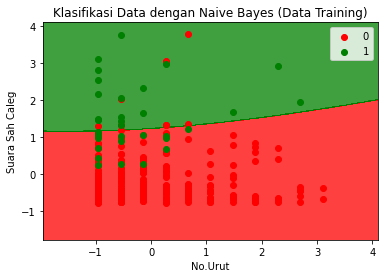

In [21]:
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
)

plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], xa_set[y_set == j, 1],
               c = ListedColormap(("red", "green"))(i), label = j)
plt.title("Klasifikasi Data dengan Naive Bayes (Data Training)")
plt.xlabel("No.Urut")
plt.ylabel("Suara Sah Caleg")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


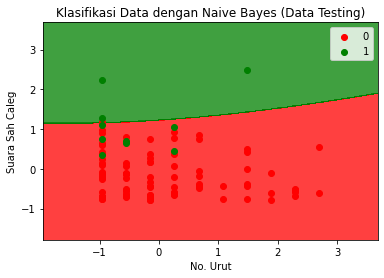

In [22]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
)

plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(("red", "green"))(i), label = j)
plt.title("Klasifikasi Data dengan Naive Bayes (Data Testing)")
plt.xlabel("No. Urut")
plt.ylabel("Suara Sah Caleg")
plt.legend()
plt.show()